In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import csv

In [24]:
training_file = '../train_08-17-20.tsv'
with open(training_file,'r') as f:
    print(len(f.readlines()))

3601


In [58]:
df = pd.read_csv(training_file,sep='\t',dtype=str,quoting=csv.QUOTE_NONE)
df

,Unnamed: 0,id_str,text,year,country,ideology,libcon_raw,libcon_norm,all_frames,Issue-General,Issue-Specific,Narrative
0,0,1010559446584627200,AS A BISEXUAL PANSEXUAL QUEER MEXICAN IRISH AM...,2018,EU,NaN,NaN,NaN,"['Cultural Identity', 'Episodic']",['Cultural Identity'],[],['Episodic']
1,1,1054083131421155329,"U.S. woman stabbed 14 times by Somali migrant,...",2018,EU,2.5308308438881042,conservative,conservative,"['Crime and Punishment', 'Health and Safety', ...","['Crime and Punishment', 'Health and Safety']",['Threat: Public Order'],['Episodic']
2,2,1025783609934979081,Led Zeppelin - Immigrant Song (Live Performanc...,2018,EU,-0.24336221964729782,liberal,liberal,[],[],[],[]
3,3,970423510295343112,"Populism, immigration in spotlight as Italy go...",2018,EU,NaN,NaN,NaN,"['Political Factors and Implications', 'Policy...","['Political Factors and Implications', 'Policy...",[],['Episodic']
4,4,1074691221287813120,Janice Atkinson: What's REALLY in the UN Migra...,2018,EU,NaN,NaN,NaN,"['Policy Prescription and Evaluation', 'Extern...","['Policy Prescription and Evaluation', 'Extern...",[],['Episodic']
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3595,1112728800956239872,@BBCPolitics because they will need migrant vo...,2019,GB,NaN,NaN,NaN,"['Political Factors and Implications', 'Themat...",['Political Factors and Implications'],[],['Thematic']
3596,3596,1086691753757941762,I have a very BIG story and i'm calling for a ...,2019,GB,NaN,NaN,NaN,"['Security and Defense', 'Episodic']",['Security and Defense'],[],['Episodic']
3597,3597,1112111989114003458,"Also: the irony of xenophobic Britain, leaving...",2019,GB,NaN,NaN,NaN,"['Fairness and Equality', 'Cultural Identity',...","['Fairness and Equality', 'Cultural Identity']",['Victim: Discrimination'],['Thematic']
3598,3598,1112977666217476096,"@melindamessnger today, standing up to @piersm...",2019,GB,NaN,NaN,NaN,"['Economic', 'Capacity and Resources', 'Health...","['Economic', 'Capacity and Resources', 'Health...",['Threat: Fiscal'],['Thematic']


In [59]:
df= df.astype(str).replace({'[]':"['No Frame']"})


In [60]:
num_none = len(df[df['all_frames']=="['No Frame']"])
num_total = len(df)
print(f"Total Annotated: {num_total}")
print(f"Total with no frames: {num_none}")
print(f"Percent with no frames: {100*num_none/num_total}")

Total Annotated: 3600
Total with no frames: 268
Percent with no frames: 7.444444444444445


In [61]:
import ast
df['all_frames'] = df['all_frames'].apply(ast.literal_eval)
df['Issue-General'] = df['Issue-General'].apply(ast.literal_eval)
df['Issue-Specific'] = df['Issue-Specific'].apply(ast.literal_eval)
df['Narrative'] = df['Narrative'].apply(ast.literal_eval)

In [68]:
df_general = df.explode('Issue-General').reset_index().drop(columns=['index'])
df_spec = df.explode('Issue-Specific').reset_index().drop(columns=['index'])
df_narr = df.explode('Narrative').reset_index().drop(columns=['index'])

## Overall Distribution

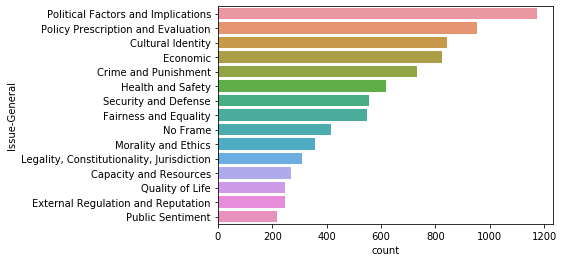

In [81]:
sns.countplot(y=df_general['Issue-General'], order = df_general['Issue-General'].value_counts().index)

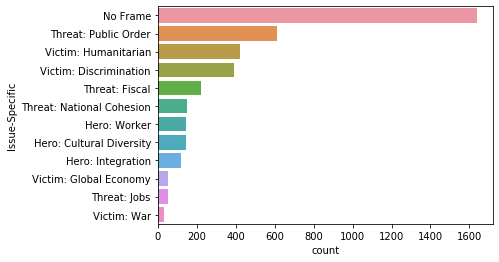

In [82]:
sns.countplot(y=df_spec['Issue-Specific'], order = df_spec['Issue-Specific'].value_counts().index)

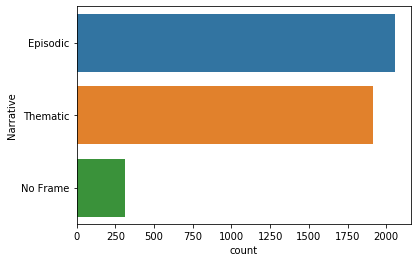

In [84]:
sns.countplot(y=df_narr['Narrative'], order = df_narr['Narrative'].value_counts().index)

## Distribution by country

In [147]:
def plot_by_country(df,frame_type):
    df_country = pd.DataFrame()
    df_country['US'] = df[df['country']=='US'][frame_type].value_counts() / df[frame_type].value_counts()
    df_country['EU'] = df[df['country']=='EU'][frame_type].value_counts() / df[frame_type].value_counts()
    df_country['GB'] = df[df['country']=='GB'][frame_type].value_counts() / df[frame_type].value_counts()
    df_country = pd.melt(df_country.reset_index(), id_vars='index',value_vars=['US','EU','GB'])
    df_country.columns = ['frame','country','percent of frame']
    sns.barplot(y='frame', x='percent of frame',data=df_country,hue='country',
            order = df_country[df_country['country']=='US'].sort_values('percent of frame')['frame'],
            hue_order=['EU','GB','US'])
    


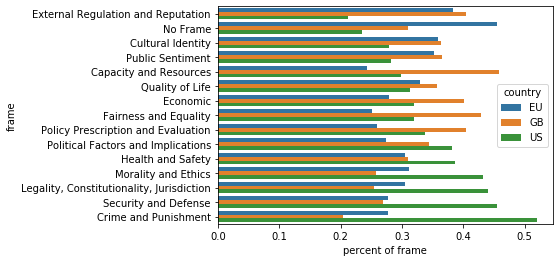

In [149]:
plot_by_country(df_general,'Issue-General')

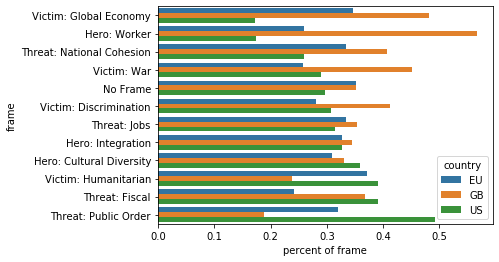

In [150]:
plot_by_country(df_spec,'Issue-Specific')

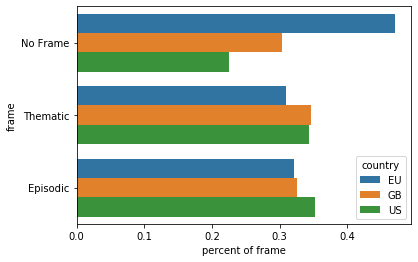

In [151]:
plot_by_country(df_narr,'Narrative')

## Distribution by ideology

In [180]:
def plot_by_ideology(df,frame_type):
    df['ideology'] = df['ideology'].astype('float').dropna()
    order = df.groupby(frame_type).agg('mean').sort_values(by='ideology').index
    sns.violinplot(x='ideology',y=frame_type,data=df, order = order,palette='husl')


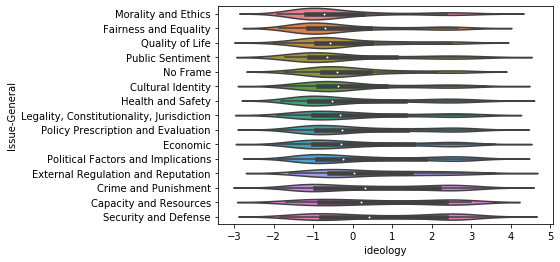

In [181]:
plot_by_ideology(df_general,'Issue-General')

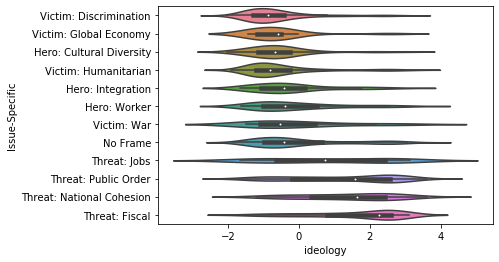

In [182]:
plot_by_ideology(df_spec,'Issue-Specific')

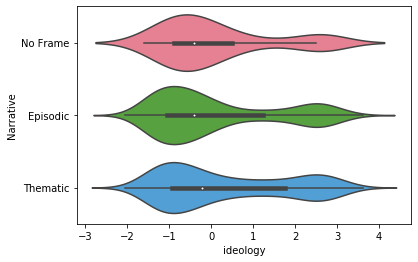

In [183]:
plot_by_ideology(df_narr,'Narrative')